In [12]:
# Librerías para cargar y transformar datos
import pandas as pd
import numpy as np
# Librerías para construir un sistema difuso
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Carga de dataframe tratado "completat422"
df_fuzzy = pd.read_csv('completat422.csv')
# filtro de datos ingreso > 0, jornada > 0 y jornada < 168
df_fuzzy = df_fuzzy[(df_fuzzy['ingocup2']>0) & (df_fuzzy['hrsocup']>0) & (df_fuzzy['hrsocup']<168)]
# Análisis descriptivo breve
df_fuzzy.describe()

,medica5c,hrsocup,ingocup2,t_tra,Aguinaldo,Vacaciones con goce de sueldo,Reparto de utilidades,Ninguna de las anteriores,No le dan nada,No sabe
count,120358.000000,120358.000000,120358.000000,120358.000000,120358.000000,120358.000000,120358.000000,120358.000000,120358.000000,120358.000000
mean,2.126165,42.901054,8470.823585,1.063918,0.483823,0.425065,0.174272,0.015279,0.242452,0.006904
std,1.126935,16.701494,7260.392295,0.244607,0.499740,0.494355,0.379345,0.122662,0.428568,0.082806
min,1.000000,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,4945.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,45.000000,7000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,50.000000,10000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,161.000000,300000.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Universos de discurso, donde se define la distribución de las variables de entrada del sistena difuso
# Acceso a instituciones de salud y otras prestaciones
Ins_Salud = ctrl.Antecedent(np.arange(1, 6, 1), 'medica5c')
# Ingreso
ingocup2 = ctrl.Antecedent(np.arange(0.0, 300001, 1), 'ingocup2')
# Jornada laboral
hrsocup = ctrl.Antecedent(np.arange(0.0, 168.0, 1), 'hrsocup')
# Cantidad de trabajos
t_tra = ctrl.Antecedent(np.arange(1.0, 3.0, 1), 't_tra')
# Variable de salida, índice de calidad del empleo
calidad_empleo = ctrl.Consequent(np.linspace(0, 150, 1000), 'calidad_empleo')

# Definir las funciones de membresía (asumiendo que ya están definidas teóricamente)
#Ingresos
ingocup2['bajo'] = fuzz.trimf(ingocup2.universe, [0, 5200, 20000])
ingocup2['medio'] = fuzz.trapmf(ingocup2.universe, [21000, 30000, 35000, 40000])
ingocup2['alto'] = fuzz.gaussmf(ingocup2.universe, 45000, 7000)
# Propuesta de variable, rango "muy alto" para evaluar el ingreso
# ingocup2['muy_alto'] = fuzz.gaussmf(ingocup2.universe, 46000, 300000)
# Jornada
hrsocup['corta'] = fuzz.trimf(hrsocup.universe, [0, 10, 28])
hrsocup['normal'] = fuzz.trapmf(hrsocup.universe, [23, 42, 65, 80])
hrsocup['larga'] = fuzz.trimf(hrsocup.universe, [56, 85, 168])
# Cantidad trabajos
t_tra['uno'] = fuzz.trimf(t_tra.universe, [1, 1, 1])
t_tra['dos'] = fuzz.trimf(t_tra.universe, [2, 2, 2])
# Calidad empleo
calidad_empleo['baja'] = fuzz.trimf(calidad_empleo.universe, [0, 25, 50])
calidad_empleo['media'] = fuzz.trapmf(calidad_empleo.universe, [25, 50, 75, 100])
calidad_empleo['alta'] = fuzz.gaussmf(calidad_empleo.universe, 100, 15)
calidad_empleo['muy_alta'] = fuzz.gaussmf(calidad_empleo.universe, 150, 15)
#Acceso a instituciones de salud
Ins_Salud['sin_prestaciones'] = fuzz.trimf(Ins_Salud.universe, [1, 1, 1])
Ins_Salud['solo_salud'] = fuzz.trimf(Ins_Salud.universe, [2, 2, 2])
Ins_Salud['salud_y_prestaciones'] = fuzz.trimf(Ins_Salud.universe, [3, 3, 3])
Ins_Salud['prestaciones_no_salud'] = fuzz.trimf(Ins_Salud.universe, [4, 4, 4])
Ins_Salud['otras_prestaciones'] = fuzz.trimf(Ins_Salud.universe, [5, 5, 5])

# Definir las reglas dusas
# Ingreso bajo
rule1 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule2 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule3 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule4 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule5 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['media'])
rule6 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
#
rule7 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['baja'])
rule8 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['baja'])
rule9 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['baja'])
rule10 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['baja'])
rule11 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
rule12 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['baja'])
#
rule13 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['baja'])
rule14 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['baja'])
rule15 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['baja'])
rule16 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['baja'])
rule17 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['media'])
rule18 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['baja'])
#
rule19 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['baja'])
rule20 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['baja'])
rule21 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['baja'])
rule22 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['baja'])
rule23 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])
rule24 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['baja'])

rule25 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule26 = ctrl.Rule(ingocup2['bajo'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule27 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule28 = ctrl.Rule(ingocup2['bajo'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule29 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
rule30 = ctrl.Rule(ingocup2['bajo'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
###############################################################################
# Ingreso alto
rule31 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['alta'])
rule32 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['media'])
rule33 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['alta'])
rule34 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['alta'])
rule35 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['alta'])
rule36 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['alta'])
#
rule37 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['alta'])
rule38 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
rule39 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['alta'])
rule40 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
rule41 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['alta'])
rule42 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
#
rule43 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['muy_alta'])
rule44 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['alta'])
rule45 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['muy_alta'])
rule46 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['alta'])
rule47 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['muy_alta'])
rule48 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['alta'])
#
rule49 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['alta'])
rule50 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])
rule51 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['alta'])
rule52 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])
rule53 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['alta'])
rule54 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])

rule55 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
rule56 = ctrl.Rule(ingocup2['alto'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule57 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule58 = ctrl.Rule(ingocup2['alto'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule59 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
rule60 = ctrl.Rule(ingocup2['alto'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
################################################################
# Ingreso medio
rule61 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule62 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule63 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule64 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
rule65 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["sin_prestaciones"], calidad_empleo['media'])
rule66 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["sin_prestaciones"], calidad_empleo['baja'])
#
rule67 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
rule68 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
rule69 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['alta'])
rule70 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
rule71 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["solo_salud"], calidad_empleo['alta'])
rule72 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["solo_salud"], calidad_empleo['media'])
#
rule73 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['alta'])
rule74 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['media'])
rule75 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['alta'])
rule76 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['media'])
rule77 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['alta'])
rule78 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["salud_y_prestaciones"], calidad_empleo['media'])
#
rule79 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])
rule80 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga'] & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])
rule81 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['alta'])
rule82 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal']& t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['media'])
rule83 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['uno'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['alta'])
rule84 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta'] & t_tra['dos'] & Ins_Salud["prestaciones_no_salud"], calidad_empleo['alta'])
#
rule85 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga']  & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
rule86 = ctrl.Rule(ingocup2['medio'] & hrsocup['larga']  & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule87 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal'] & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
rule88 = ctrl.Rule(ingocup2['medio'] & hrsocup['normal'] & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])
rule89 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta']  & t_tra['uno'] & Ins_Salud["otras_prestaciones"], calidad_empleo['media'])
rule90 = ctrl.Rule(ingocup2['medio'] & hrsocup['corta']  & t_tra['dos'] & Ins_Salud["otras_prestaciones"], calidad_empleo['baja'])

# Crear el sistema de control duso (reglas difusas)
calidad_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, 
                                   rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, 
                                   rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule24, 
                                   rule25,rule26, rule27, rule28, rule29, rule30,rule31,rule32,
                                   rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40,rule41,
                                   rule42,rule43,rule44,rule45,rule46,rule47,rule48,rule49,rule50,
                                   rule51,rule52,rule53,rule54,rule55,rule56,rule57,rule58,rule59,
                                   rule60,rule61,rule62,rule63,rule64,rule65,rule66,rule67,rule68,
                                   rule69,rule70,rule71,rule72,rule73,rule74,rule75,rule76,
                                   rule77,rule78,rule79,rule80,rule81,rule82,rule83,rule84,
                                   rule85,rule86,rule87,rule88,rule89,rule90
                                  ])

calidad_sim = ctrl.ControlSystemSimulation(calidad_ctrl, clip_to_bounds=False)


In [15]:
# lista vacía para guardar resultados
resultados = []

df_fuz = df_fuzzy # .sample(n=1000, random_state=1)
# Se itera en cada columna necesaria del dataframe df_fuz para extraer sus datos e insertarlos en el sistema 
for index, row in df_fuz.iterrows():
    
    ing = row['ingocup2']
    hrs = row['hrsocup']
    t_tra = row['t_tra']
    Ins_Salud = row['medica5c']
    # Se añaden al sistema de control
    calidad_sim.input['ingocup2'] = ing
    calidad_sim.input['hrsocup'] = hrs
    calidad_sim.input['t_tra'] = t_tra
    calidad_sim.input['medica5c'] = Ins_Salud
    
    calidad_sim.compute()
    # Se van agregando los resultados a la lista vacía
    resultados.append((ing, hrs, t_tra, Ins_Salud, calidad_sim.output['calidad_empleo']))
# Datafrmae con el índice de la calidad del empelo y el valor de cada variable a la que corresponde una fila por cada trabajador 
eval_df_n = pd.DataFrame(resultados, columns=['Salario', 'Jornada', 'Empleos', "Salud y prestaciones", 'Calidad del empleo'])
eval_df_n

,Salario,Jornada,Empleos,Salud y prestaciones,Calidada del empleo
0,2580.0,12.0,1.0,1.0,62.499865
1,9600.0,47.0,1.0,3.0,25.000827
2,9600.0,48.0,1.0,3.0,25.000827
3,6880.0,48.0,1.0,3.0,25.000103
4,7740.0,72.0,1.0,1.0,25.000264
...,...,...,...,...,...
120353,2150.0,50.0,2.0,1.0,25.000003
120354,7740.0,50.0,2.0,1.0,25.000218
120355,7740.0,48.0,1.0,2.0,25.000218
120356,7955.0,60.0,1.0,1.0,25.000258


In [93]:
eval_df_n["Rango"] = eval_df['Calidada del empleo'].apply(calidad_rango)
eval_df_n.to_csv('resultados_skfuzzy.csv', index=False)
eval_df_n.describe()

,Salario,Jornada,Empleos,Salud y prestaciones,Calidada del empleo
count,120358.000000,120358.000000,120358.000000,120358.000000,1.203580e+05
mean,8470.823585,42.901054,1.063918,2.126165,3.392882e+01
std,7260.392295,16.701494,0.244607,1.126935,1.988343e+01
min,30.000000,1.000000,1.000000,1.000000,3.479048e-269
25%,4945.000000,35.000000,1.000000,1.000000,2.500005e+01
50%,7000.000000,45.000000,1.000000,3.000000,2.500039e+01
75%,10000.000000,50.000000,1.000000,3.000000,2.504678e+01
max,300000.000000,161.000000,2.000000,5.000000,1.380316e+02


In [80]:
eval_df_n['Calidada del empleo'].max()

96.07911862286393

             Salario        Jornada        Empleos  Salud y prestaciones  \
count  120358.000000  120358.000000  120358.000000         120358.000000   
mean     8470.823585      42.901054       1.063918              2.126165   
std      7260.392295      16.701494       0.244607              1.126935   
min        30.000000       1.000000       1.000000              1.000000   
25%      4945.000000      35.000000       1.000000              1.000000   
50%      7000.000000      45.000000       1.000000              3.000000   
75%     10000.000000      50.000000       1.000000              3.000000   
max    300000.000000     161.000000       2.000000              5.000000   

       Calidada del empleo  
count         1.203580e+05  
mean          3.392882e+01  
std           1.988343e+01  
min          3.479048e-269  
25%           2.500005e+01  
50%           2.500039e+01  
75%           2.504678e+01  
max           1.380316e+02  
           Rango      0
0   Calidad alta   5151
1   Ca

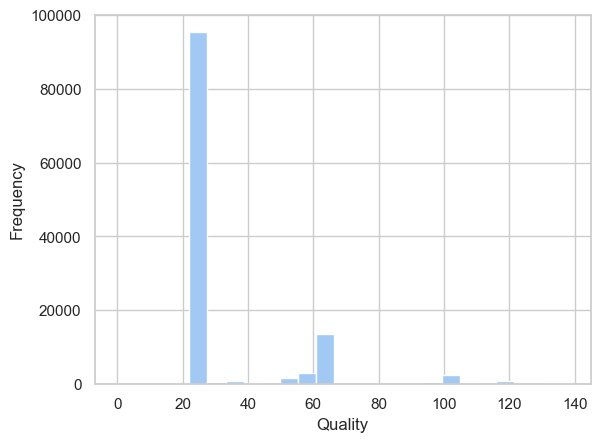

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid",palette='pastel')
# Exploración de la distribución de la Calidad de Empleo
plt.hist(eval_df_n['Calidada del empleo'], bins=25)
plt.ylabel("Frequency")
plt.xlabel("Quality")
print(eval_df_n.describe())
print(eval_df_n.groupby(['Rango']).size().reset_index())

(<Figure size 640x480 with 1 Axes>, <Axes: >)

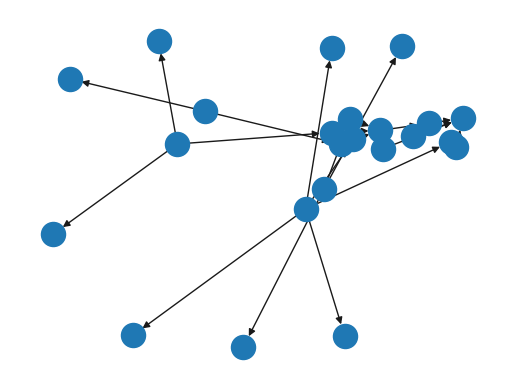

In [23]:
rule1.view()

C:\Users\Adrián Vázquez\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


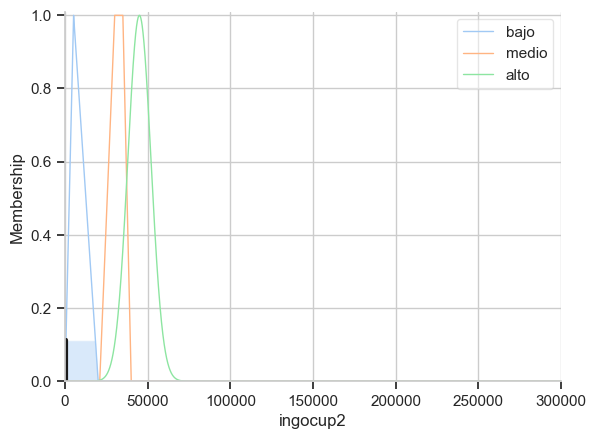

In [85]:
ingocup2.view(sim=calidad_sim)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid",palette='pastel')

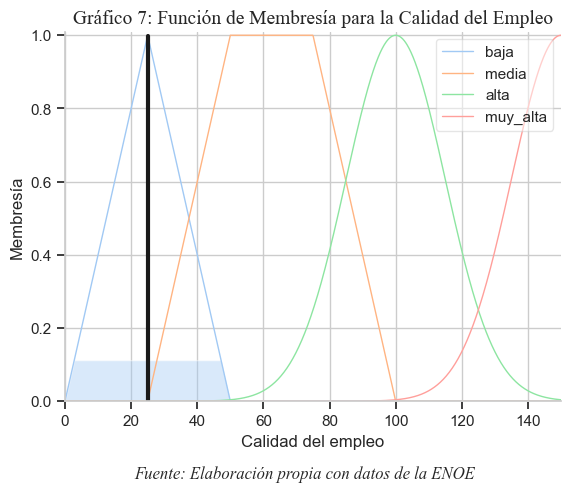

In [18]:

calidad_empleo.view(sim=calidad_sim)
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 12}
# Titulo
plt.title('Gráfico 7: Función de Membresía para la Calidad del Empleo', fontdict=font_t)
plt.figtext(0.50, -0.05, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)

plt.xlabel('Calidad del empleo')
plt.ylabel('Membresía')
plt.savefig('func_mem.png', bbox_inches='tight')

Text(0.5, 0, 'Número-empleos')

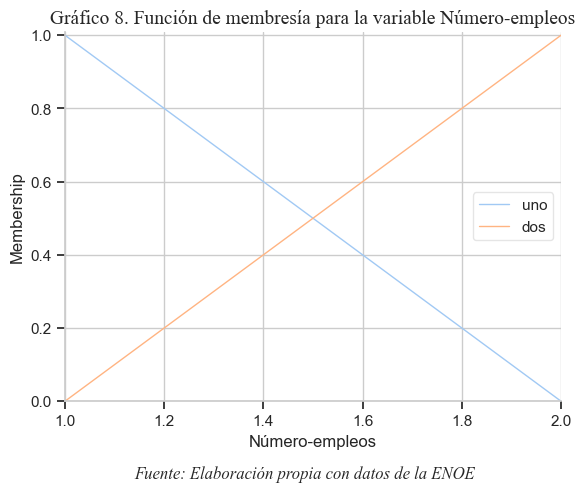

In [25]:
import matplotlib.pyplot as plt
t_tra.view()
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 12}
# Titulo
plt.title('Gráfico 8. Función de membresía para la variable Número-empleos', fontdict=font_t)
plt.figtext(0.50, -0.05, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)

plt.xlabel('Número-empleos')
# plt.savefig('func_mem_tra.png', bbox_inches='tight')

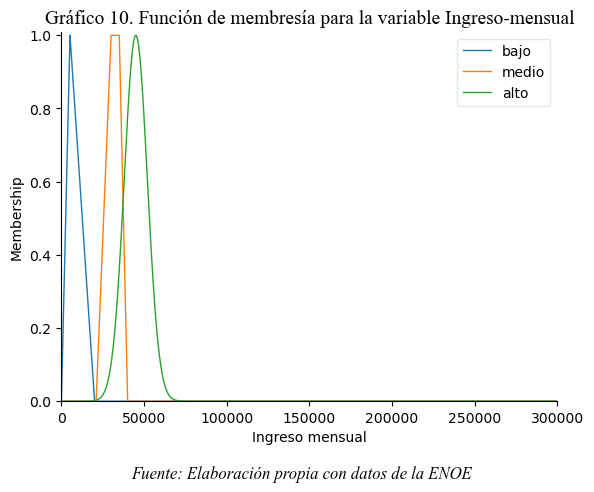

In [31]:
import matplotlib.pyplot as plt
ingocup2.view()
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 12}
# Titulo
plt.title('Gráfico 10. Función de membresía para la variable Ingreso-mensual', fontdict=font_t)
plt.figtext(0.50, -0.05, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)

plt.xlabel('Ingreso mensual')
plt.savefig('_fun_m_ing_men.png', bbox_inches='tight')

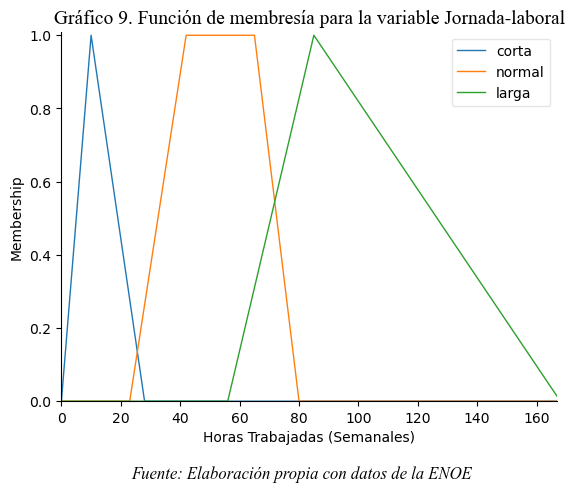

In [29]:
import matplotlib.pyplot as plt
hrsocup.view()
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 12}
# Titulo
plt.title('Gráfico 9. Función de membresía para la variable Jornada-laboral', fontdict=font_t)
plt.figtext(0.50, -0.05, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)

plt.xlabel('Horas Trabajadas (Semanales)')
plt.savefig('func_mem_hrsocup.png', bbox_inches='tight')

Text(0.5, 0, 'Instituciones salud y Prestaciones')

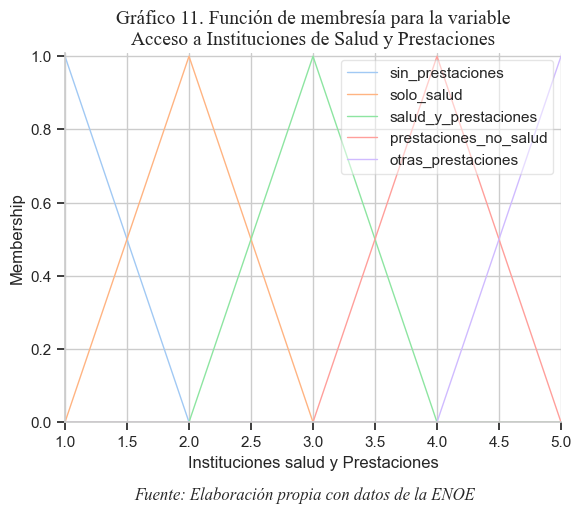

In [26]:
import matplotlib.pyplot as plt
Ins_Salud.view()
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 12}
# Titulo
plt.title('Gráfico 11. Función de membresía para la variable\n' 
          'Acceso a Instituciones de Salud y Prestaciones', fontdict=font_t)
plt.figtext(0.50, -0.05, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)

plt.xlabel('Instituciones salud y Prestaciones')
# plt.savefig('func_mem_insalud.png', bbox_inches='tight')

In [11]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
